In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy import *
import math

Los datos de la vacuna fueron extraídos del repositorio Github del Ministerio de Ciencias de Chile, fue escogido el producto 81 que ordena los datos con el codigo de comuna y la cantidad de vacunados de cierta edad.

In [2]:
url_data = (r'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/vacunacion_comuna_edad_1eraDosis.csv')

vacunas = pd.read_csv(url_data)
dfvac = pd.DataFrame(vacunas)
dfvac = dfvac.loc[dfvac['Region'] == 'Metropolitana']

dfvac.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,15,16,17,18,19,...,71,72,73,74,75,76,77,78,79,80
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,17.0,19.0,...,62.0,40.0,44.0,33.0,34.0,37.0,26.0,30.0,22.0,186.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,224.0,274.0,...,595.0,537.0,481.0,429.0,412.0,413.0,368.0,353.0,299.0,2153.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,91.0,71.0,...,193.0,189.0,142.0,149.0,131.0,144.0,125.0,106.0,73.0,711.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,158.0,136.0,...,454.0,471.0,492.0,506.0,378.0,427.0,384.0,375.0,392.0,2361.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,245.0,329.0,...,816.0,775.0,733.0,681.0,716.0,631.0,587.0,554.0,494.0,3069.0


https://www.interviewqs.com/ddi-code-snippets/rows-cols-python

In [3]:
url_data = (r'https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv')

idh = pd.read_csv(url_data)
dfidh = pd.DataFrame(idh)

dfidh.head()

,comuna,LEI,II,EI,idh,HDI
0,13101,0.791672,0.873137,0.924099,0.807,0.861222
1,13102,0.782817,0.800343,0.713499,0.743,0.764616
2,13103,0.752447,0.750382,0.657961,0.683,0.718874
3,13104,0.784872,0.760697,0.705426,0.707,0.749584
4,13105,0.777236,0.780019,0.673876,0.711,0.742015


In [24]:
url_data = (r'https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/pobXedadCenso.csv')

pob = pd.read_csv(url_data)
dfpob = pd.DataFrame(pob)
dfpob.head()

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101,0,0,15,0
1,1101,*,*,54,10
2,1101,*,0,28,*
3,1101,*,7,49,*
4,1101,*,*,26,7


Una vez lista la importación de los datos, se comenzará con la revisión de la integridad de estos.

In [25]:
d1 = dfvac[vacunas.duplicated()].shape
d2 = dfidh[dfidh.duplicated()].shape
d3 = dfpob[dfpob.duplicated()].shape

print(d1)
print(d2)
print(d3)

(0, 71)
(0, 6)
(25911, 5)


<ipython-input-25-bd9937ca663f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d1 = dfvac[vacunas.duplicated()].shape


En los datos de vacuna y de IDH no tenemos datos duplicados, sin embargo, nos podemos dar cuenta que en los datos de la población por comuna existen múltiples entradas para un mismo código de comuna, se asumirá que deben ser sumados por comuna.

https://stackoverflow.com/questions/56759142/pandas-replace-the-asterisk-sign-from-two-columns-in-one-go

In [26]:
dfpob = dfpob.replace({'\*': '0'}, regex=True)
dfpob.head()

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101,0,0,15,0
1,1101,0,0,54,10
2,1101,0,0,28,0
3,1101,0,7,49,0
4,1101,0,0,26,7


In [17]:
dfpob.dtypes

COMUNA          int64
EDAD_0A5       object
EDAD_6A14      object
EDAD_15A64     object
EDAD_65YMAS    object
dtype: object

https://stackoverflow.com/questions/15891038/change-column-type-in-pandas

In [ ]:
dfpob['EDAD_0A5'] = pd.to_numeric(dfpob['EDAD_0A5'])

In [27]:
dfpob[['EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS']] = dfpob[['EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS']].apply(pd.to_numeric)

In [19]:
list(dfpob.columns.values)

['COMUNA', 'EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS']

In [20]:
dfpob.dtypes

COMUNA         int64
EDAD_0A5       int64
EDAD_6A14      int64
EDAD_15A64     int64
EDAD_65YMAS    int64
dtype: object

In [21]:
dfpob.sum()

COMUNA         1622601098
EDAD_0A5          1146783
EDAD_6A14         1871924
EDAD_15A64       11952655
EDAD_65YMAS       1817479
dtype: int64

Los datos son cercanos a 17 millones por lo tanto tienen sentido.

**Agrupar los datos de población por codigo de comuna**

In [28]:
dfpob = dfpob.groupby(by=["COMUNA"], as_index=False).sum().reset_index(drop=True)


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html <br>

https://stackoverflow.com/questions/41658498/in-pandas-after-groupby-the-grouped-column-is-gone


In [29]:
dfpob

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101,15490,22691,132629,16895
1,1107,10105,17365,72866,3908
2,1401,899,1786,9446,864
3,1402,73,134,772,136
4,1403,75,111,1246,148
...,...,...,...,...,...
341,14204,1433,2829,19778,3939
342,15101,16125,26165,148234,22224
343,15102,36,74,728,154
344,15201,31,94,2169,118


In [30]:
dfvac = dfvac.dropna()

In [ ]:
dfcomunas = dfvac.loc[:, 'Comuna':'Codigo comuna']

In [ ]:
dfcomunas 

https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe

In [37]:
#dfcomunas.to_csv(r'C:\Users\vicen\Downloads\dfcomunas.csv', index = False)
#dfpob.to_csv(r'C:\Users\vicen\Downloads\dfpob.csv', index = False)
#dfvac.to_csv(r'C:\Users\vicen\Downloads\dfvac.csv', index = False)
#dfidh.to_csv(r'C:\Users\vicen\Downloads\dfidh.csv', index = False)

In [31]:
list(dfpob.columns.values)

['COMUNA', 'EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS']

**Disclaimer** No pude generar las columnas con los cálculos que quería, por lo tanto exporté los DF e hice las operaciones en excel

In [33]:
vacunas = pd.read_csv(r'C:\Users\vicen\Desktop\Universidad\Analisis datos 21-1\vacunas2.csv',delimiter=';')
dfvac = pd.DataFrame(vacunas)
comunas = pd.read_csv(r'C:\Users\vicen\Desktop\Universidad\Analisis datos 21-1\comunas2.csv',delimiter=';')
dfcomunas = pd.DataFrame(comunas)

In [35]:
dfcomunas.head()

,Comuna,Codigo comuna,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS,TOTAL,PROP 65+,%VACUNAS
0,Alhue,13502,309,489,4472,600,5870,10%,68%
1,Buin,13402,7296,11651,66360,7667,92974,8%,62%
2,Calera de Tango,13403,1700,2991,17442,2072,24205,9%,70%
3,Cerrillos,13102,5907,8703,53650,9273,77533,12%,53%
4,Cerro Navia,13103,9719,14745,89915,16011,130390,12%,47%


In [36]:
dfvac.head()

,Region,Codigo region,Comuna,Codigo comuna,% VACUNADOS,Poblacion,TOTAL VACUNADOS,15,16,17,...,71,72,73,74,75,76,77,78,79,80
0,Metropolitana,13,Alhue,13502,68%,74050,50200,0,0,0,...,620,400,440,330,340,370,260,300,220,1860
1,Metropolitana,13,Buin,13402,62%,1096410,678220,0,0,0,...,5950,5370,4810,4290,4120,4130,3680,3530,2990,21530
2,Metropolitana,13,Calera de Tango,13403,70%,285250,199240,0,0,0,...,1930,1890,1420,1490,1310,1440,1250,1060,730,7110
3,Metropolitana,13,Cerrillos,13102,53%,889560,469290,0,0,0,...,4540,4710,4920,5060,3780,4270,3840,3750,3920,23610
4,Metropolitana,13,Cerro Navia,13103,47%,1424650,663470,0,0,0,...,8160,7750,7330,6810,7160,6310,5870,5540,4940,30690


Text(0.5, 1.0, 'Muertes totales por semana desde 2016')

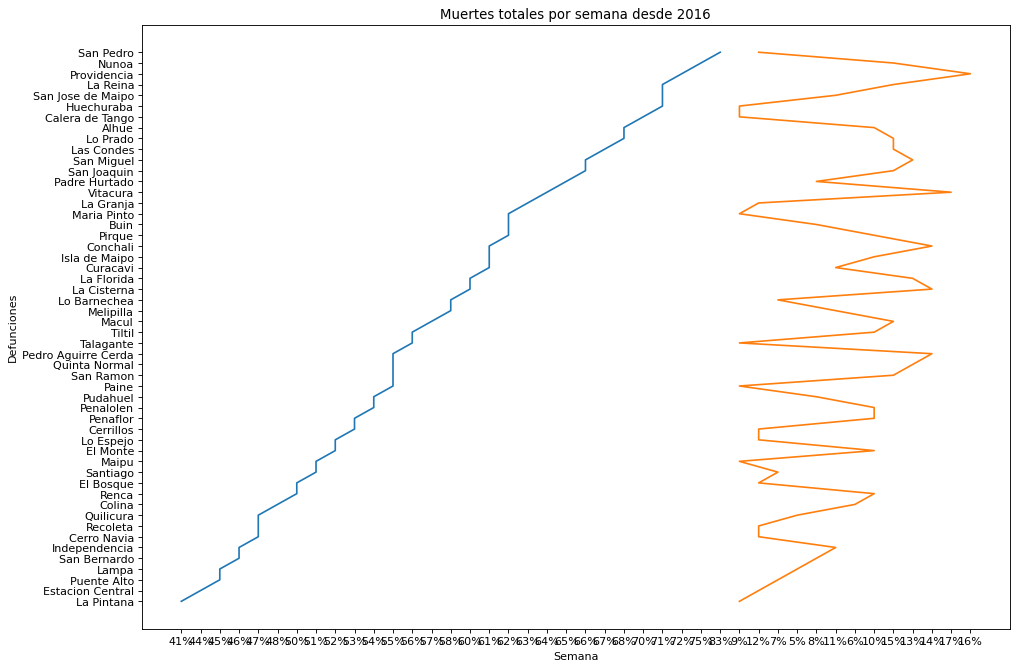

In [64]:
figure(figsize=(14, 10), dpi=80)
plt.plot(dfcomunas['%VACUNAS'],dfcomunas['Comuna'])
plt.plot(dfcomunas['PROP 65+'],dfcomunas['Comuna'])
plt.xlabel('Semana')
plt.ylabel('Defunciones')
plt.title('Muertes totales por semana desde 2016')

In [58]:
dfcomunas = dfcomunas.sort_values(by='%VACUNAS', ascending=True, na_position='first')

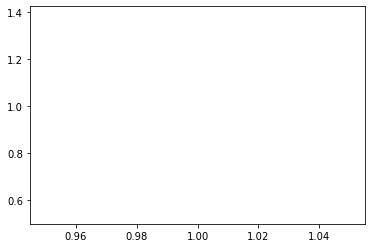

In [53]:
t = 1
a = sin(t)
b = cos(t)
c = a + b

plt.plot(t, a, t, b, t, c)
plt.show()